In [4]:
import os 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
cwd = os.getcwd()
file_no_coupling = os.path.join(cwd, os.path.join('../data/data_grid/',
        'basic_sspdim_151_pinneurons_700_T_120_seed_0_time_1713407826.9009564.npz'))
files_phase = os.path.join(cwd, os.path.join('../data/data_grid/',
        'phase_sspdim_151_pinneurons_700_T_120_seed_0_time_1713413544.2580326.npz'))
files_triple = os.path.join(cwd, os.path.join('../data/data_grid/',
        'triple_sspdim_151_pinneurons_700_T_120_seed_0_time_1713410750.927551.npz'))
files_shift =  os.path.join(cwd, os.path.join('../data/data_grid/',
        'shift_sspdim_151_pinneurons_700_T_120_seed_0_time_1713416801.7671654.npz'))
files_exact = os.path.join(cwd, os.path.join('../data/data_grid/',
        'exact_sspdim_151_pinneurons_700_T_120_seed_0_time_1713419408.2211132.npz'))

In [6]:
data_no_coupling = np.load(file_no_coupling)
data_phase = np.load(files_phase)
data_triple = np.load(files_triple)
data_shift = np.load(files_shift)
data_exact = np.load(files_exact)
data = [
    data_no_coupling,
    data_phase,
    data_triple,
    data_shift
]

titles = [
    'No Coupling',
    'Tangent Coupling',
    'Triple Coupling',
    'Phase Shift Coupling'
]

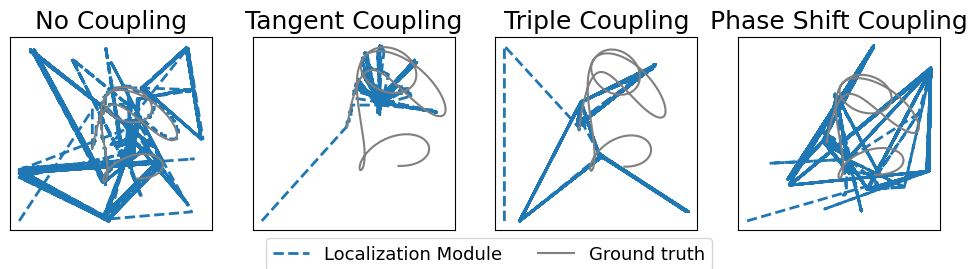

In [7]:
fig, ax = plt.subplots(1,4, figsize=(12,2.5))
for i in range(len(data)):
    ax[i].set_xticks([])
    ax[i].set_yticks([])

    this_data = data[i]
    sim_path_est = this_data['pi_path'][0:60000]
    path = this_data['path'][0:60000]
    ax[i].plot(sim_path_est[10:-1000,0], sim_path_est[10:-1000,1],'--', label='Localization Module', lw=2)
    ax[i].plot(path[:,0], path[:,1],color='gray', label='Ground truth')
    ax[i].set_title(titles[i], fontsize=18)

fig.legend(*ax[0].get_legend_handles_labels(),
            loc='lower center', ncol=2, fontsize=13, borderaxespad = -0.1)
plt.show()

In [8]:
spike_data = data_no_coupling['neurons_out']
one_neuron = spike_data[:,0]

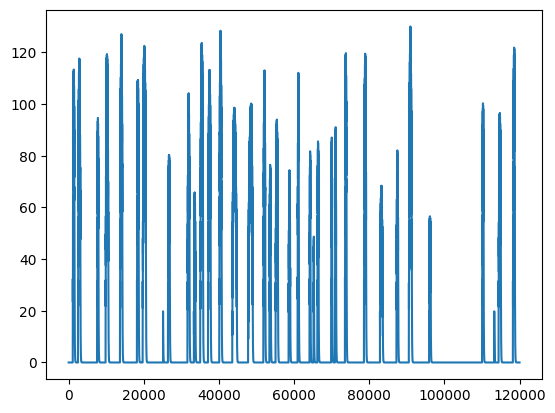

In [9]:
plt.plot(one_neuron)
plt.show()

In [10]:
import scipy

In [11]:
peaks = scipy.signal.find_peaks(one_neuron, distance=1000)
print(peaks)
print(len(peaks[0]))

(array([  1364,   2852,   7791,  10199,  14038,  18463,  20145,  25122,
        26745,  31943,  33551,  35421,  37502,  40414,  44096,  48589,
        52126,  53634,  55404,  58775,  61131,  64270,  65278,  66361,
        70029,  71065,  73789,  78924,  83249,  87486,  90953,  96138,
       110262, 113270, 114775, 118557]), {})
36


<>:65: SyntaxWarning: invalid escape sequence '\q'
<>:65: SyntaxWarning: invalid escape sequence '\q'
/tmp/ipykernel_98843/1646038118.py:65: SyntaxWarning: invalid escape sequence '\q'
  fig.supylabel(f'$\\longleftarrow$ Time $\qquad$', fontsize=22)


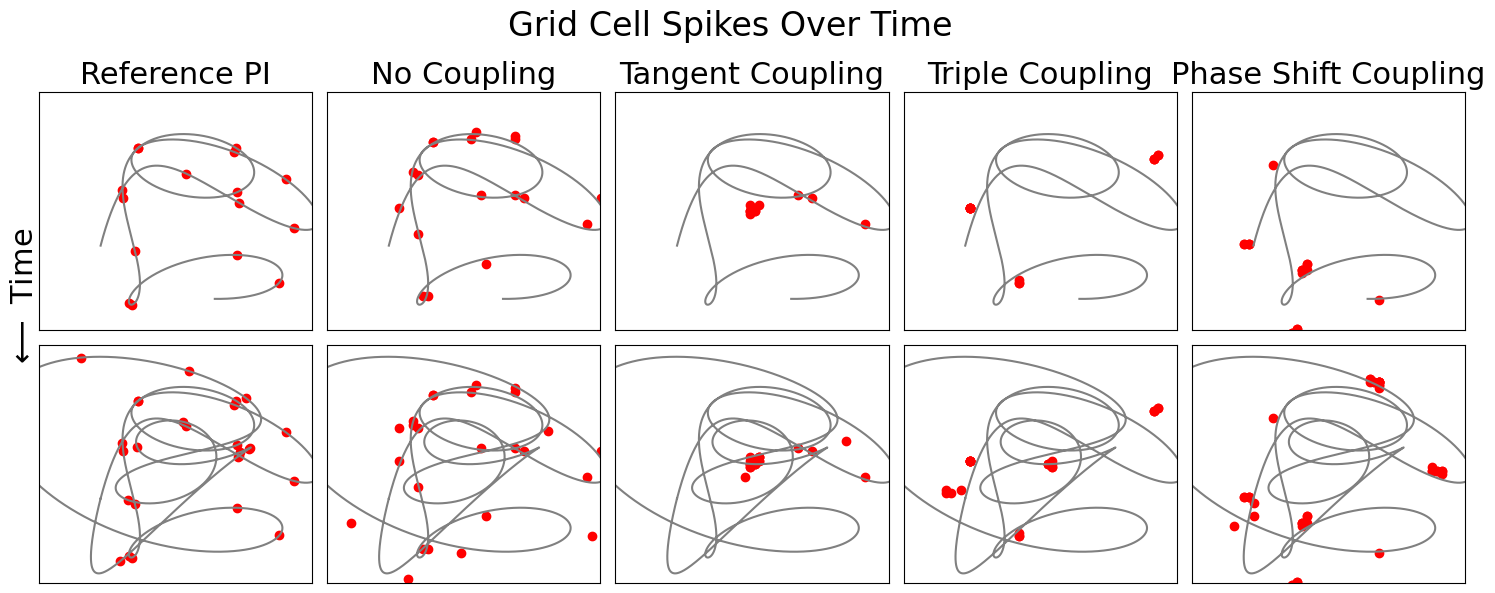

In [12]:
fig, ax = plt.subplots(2,5, figsize=(15,6), layout='tight',
                        sharex=True, sharey=True)
plt.setp(ax, xlim=(-1.2,1.2), ylim=(-1.2,1.2))

neuron_exact = data_exact['neurons_out'][0:60000,0]
peaks = scipy.signal.find_peaks(neuron_exact, distance=1000)
path = data_exact['path'][0:60000]
grid_cell_spikes = path[peaks[0]]

ax[0][0].set_xticks([])
ax[0][0].set_yticks([])
ax[0][0].plot(path[:,0], path[:,1],color='gray')
ax[0][0].set_title('Reference PI', fontsize=22)
ax[0][0].scatter(grid_cell_spikes[:,0], grid_cell_spikes[:,1], color='red')

for i in range(len(data)):
    ax[0][i+1].set_xticks([])
    ax[0][i+1].set_yticks([])

    this_data = data[i]
    sim_path_est = this_data['pi_path']
    path = this_data['path'][0:60000]
    spike_data = this_data['neurons_out']
    one_neuron = spike_data[0:60000,0]
    
    peaks = scipy.signal.find_peaks(one_neuron, distance=1000)
    grid_cell_spikes = sim_path_est[peaks[0]]
    
    # ax[i].plot(sim_path_est[10:-1000,0], sim_path_est[10:-1000,1],'--', label='Localization Module', lw=2)
    ax[0][i+1].plot(path[:,0], path[:,1],color='gray')
    ax[0][i+1].set_title(titles[i], fontsize=22)
    ax[0][i+1].scatter(grid_cell_spikes[:,0], grid_cell_spikes[:,1], color='red')

neuron_exact = data_exact['neurons_out'][:,0]
peaks = scipy.signal.find_peaks(neuron_exact, distance=1000)
path = data_exact['path']
grid_cell_spikes = path[peaks[0]]

ax[1][0].set_xticks([])
ax[1][0].set_yticks([])
ax[1][0].plot(path[:,0], path[:,1],color='gray')
#ax[1][0].set_title('Reference PI', fontsize=18)
ax[1][0].scatter(grid_cell_spikes[:,0], grid_cell_spikes[:,1], color='red')

for i in range(len(data)):
    ax[1][i+1].set_xticks([])
    ax[1][i+1].set_yticks([])

    this_data = data[i]
    sim_path_est = this_data['pi_path']
    path = this_data['path']
    spike_data = this_data['neurons_out']
    one_neuron = spike_data[:,0]
    
    peaks = scipy.signal.find_peaks(one_neuron, distance=1000)
    grid_cell_spikes = sim_path_est[peaks[0]]
    
    # ax[i].plot(sim_path_est[10:-1000,0], sim_path_est[10:-1000,1],'--', label='Localization Module', lw=2)
    ax[1][i+1].plot(path[:,0], path[:,1],color='gray')
    #ax[1][i+1].set_title(titles[i], fontsize=18)
    ax[1][i+1].scatter(grid_cell_spikes[:,0], grid_cell_spikes[:,1], color='red')

# fig.legend(*ax[0][1].get_legend_handles_labels(),
#           loc='lower center', ncol=2, fontsize=13, borderaxespad = -0.1)
fig.supylabel(f'$\\longleftarrow$ Time $\qquad$', fontsize=22)
fig.suptitle(f'Grid Cell Spikes Over Time', fontsize=24)
plt.show()